In [1]:
# Jupyter Notebook

# Importing required libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Reading the dataset
df = pd.read_csv("Data_to_ModelBuilding.csv")

# Display the first few rows of the dataset
df.head()

,YearsFromRegistration,powerPS,kilometer,abtest_test,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,fuelType_lpg,fuelType_other,fuelType_petrol,gearbox_manual,notRepairedDamage_yes,brand_encoded,monthOfRegistration_Q2,monthOfRegistration_Q3,monthOfRegistration_Q4,price
0,20,150,150000,1,0,0,1,0,0,0,...,0,0,0,1,0,2,0,0,0,4450
1,18,163,150000,0,0,0,0,0,0,0,...,0,0,0,1,0,39,1,0,0,13299
2,20,101,150000,1,0,0,0,0,0,0,...,0,0,0,1,0,38,0,0,1,3200
3,17,86,60000,0,0,0,0,0,1,0,...,0,0,1,1,0,30,0,0,1,4500
4,15,185,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,39,0,0,1,18750


# Train test split

In [3]:
from sklearn.model_selection import train_test_split

# Extracting target variable
y = df.pop('price')
X = df

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the training set
X_train.head()

,YearsFromRegistration,powerPS,kilometer,abtest_test,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,gearbox_manual,notRepairedDamage_yes,brand_encoded,monthOfRegistration_Q2,monthOfRegistration_Q3,monthOfRegistration_Q4
3834,19,69,90000,1,0,0,0,0,1,0,...,0,0,0,1,1,1,10,0,0,0
17567,17,170,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,38,1,0,0
35930,26,125,150000,1,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4528,12,170,90000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,20,0,0,1
17204,21,177,50000,0,0,0,1,0,0,0,...,0,0,0,1,0,0,20,0,1,0


# Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
import pickle
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select columns to scale
columns_to_scale = ['YearsFromRegistration', 'powerPS', 'kilometer', 'brand_encoded']

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test[columns_to_scale])

# Replace the original columns with the scaled ones in both training and test sets
X_train[columns_to_scale] = X_train_scaled
X_test[columns_to_scale] = X_test_scaled

# Save the scaler to a file
with open('min_max_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [5]:
# Display the first few rows of the scaled training set
X_train.head()

,YearsFromRegistration,powerPS,kilometer,abtest_test,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,gearbox_manual,notRepairedDamage_yes,brand_encoded,monthOfRegistration_Q2,monthOfRegistration_Q3,monthOfRegistration_Q4
3834,0.166667,0.029397,0.586207,1,0,0,0,0,1,0,...,0,0,0,1,1,1,0.256410,0,0,0
17567,0.144444,0.079721,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.974359,1,0,0
35930,0.244444,0.057299,1.000000,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0.025641,0,0,0
4528,0.088889,0.079721,0.586207,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.512821,0,0,1
17204,0.188889,0.083209,0.310345,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.512821,0,1,0


In [6]:
df.columns

Index(['YearsFromRegistration', 'powerPS', 'kilometer', 'abtest_test',
       'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_limousine',
       'vehicleType_others', 'vehicleType_small car',
       'vehicleType_station wagon', 'vehicleType_suv', 'fuelType_diesel',
       'fuelType_electro', 'fuelType_hybrid', 'fuelType_lpg', 'fuelType_other',
       'fuelType_petrol', 'gearbox_manual', 'notRepairedDamage_yes',
       'brand_encoded', 'monthOfRegistration_Q2', 'monthOfRegistration_Q3',
       'monthOfRegistration_Q4'],
      dtype='object')

# Regression

In [6]:
# pip install xgboost

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [8]:
# Initialize and Train Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
}

# Results dictionary
results = {'Model': [], 'MSE': [], 'R-squared': []}

# Loop through each model
for model_name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate Model Performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

# Display Results
results_df = pd.DataFrame(results)
print(results_df)


                Model           MSE  R-squared
0   Linear Regression  2.743157e+07   0.558035
1    Ridge Regression  2.751810e+07   0.556641
2    Lasso Regression  2.746741e+07   0.557457
3      Bayesian Ridge  2.743900e+07   0.557915
4     Huber Regressor  2.906223e+07   0.531762
5                 SVR  6.499398e+07  -0.047154
6                 KNN  2.823813e+07   0.545040
7       Decision Tree  2.352441e+07   0.620985
8       Random Forest  1.213472e+07   0.804491
9   Gradient Boosting  1.189941e+07   0.808282
10            XGBoost  1.005994e+07   0.837919


# XGBoost Regressor

In [9]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor()

# Define a parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Best Hyperparameters:", best_params)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 9800726.655953266
R-squared: 0.8420950729437067


In [11]:
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
# Save the trained model to a pickle file
import pickle
with open('best_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)

In [1]:
import pickle
with open('best_xgb_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)


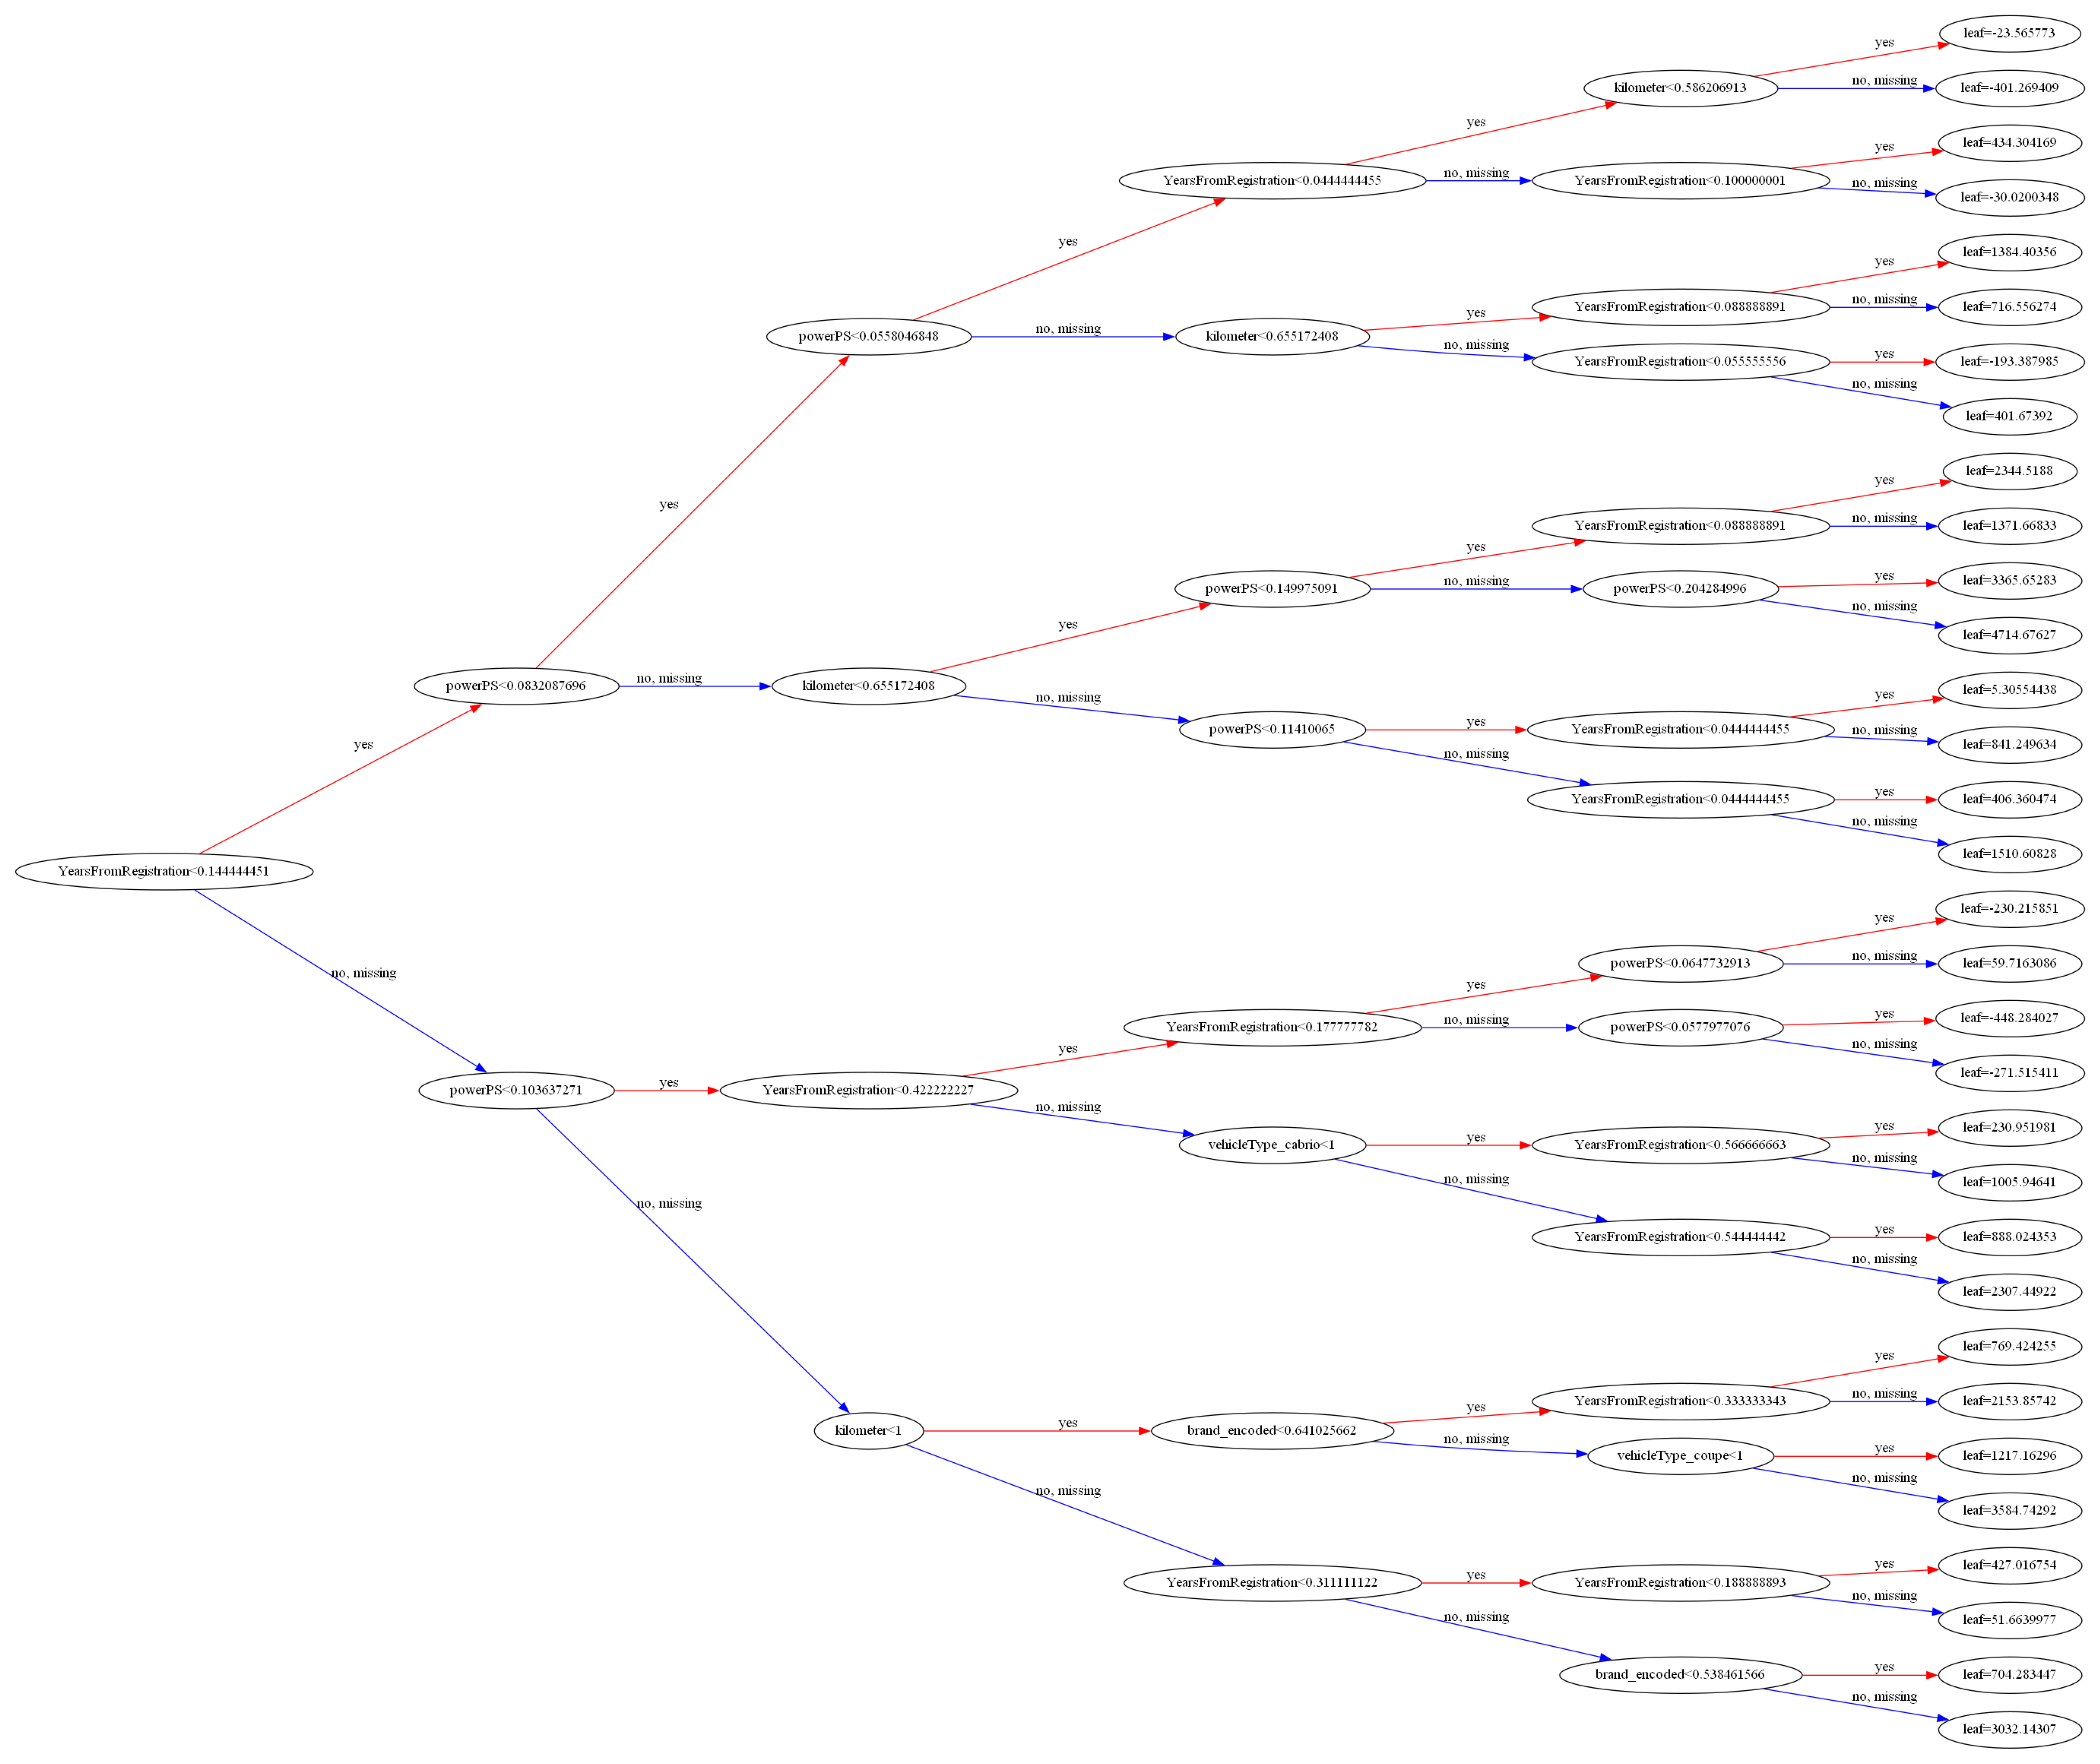

In [6]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Assuming best_xgb_model is the fitted XGBoost model
fig, ax = plt.subplots(figsize=(30, 20), dpi=300)  # Adjust figsize and dpi as needed
plot_tree(model, num_trees=0, rankdir='LR', ax=ax)  # num_trees is the index of the tree
plt.show()